# DATA 602: Final Project Proposal
Andrew Bowen
CUNY DATA602: Advanced Programming Techniques


## Research Question
Are certain areas of New York City more affected by poverty rates than other? What factors are the primary inputs into this state?

## Justification

As a New York City resident, I am affected by policies implemented by the city in order to counteract poverty. Communities in which residents live below the poverty line face challenges that directly stem from the issue. INvestigating this helps to inform myself and those around me which areas of the city are impacted most by poverty, and where to focus resources to alleviate the problem.

## Data Sources

I found some open-source datasets included on [NYCOpen Data](). The dataset in question for this project contains data on the [financial health of different NYC neighborhoods](https://data.cityofnewyork.us/Business/Neighborhood-Financial-Health-Digital-Mapping-and-/r3dx-pew9). This dataset includes the median salary, as well as other demographic indicators. This dataset is based off of [NYC's Neighborhood Financial Health mapping tool](https://www.nyc.gov/assets/dca/NFHI/NFHI/Index.html). I uploaded the CSV of this dataset to my [GitHub](https://raw.githubusercontent.com/andrewbowen19/advancedProgrammingData602/main/data/nyc-poverty-puma.csv) for the ability for others to reproduce. 

## Libraries potentially being used
The libraries imported below will be used. `pandas` and `numpy` will be used for data manipulation, as well as `matplotlib` for data visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading in file from github
file_path = "https://raw.githubusercontent.com/andrewbowen19/advancedProgrammingData602/main/data/nyc-poverty-puma.csv"

df = pd.read_csv(file_path)

df.head()

,Year Published,PUMA,Borough,Neighborhoods,CD,Join,NYC_Poverty_Rate,Median_Income,Perc_White,Perc_Black,...,Ind6Rank,Ind6Definition,Ind7,Ind7Outcome,Ind7Rank,Ind7Definition,Ind8,Ind8Outcome,Ind8Rank,Ind8Definition
0,2020,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",BX Community District 8,3701,0.152,30437,0.324,0.124,...,32.0,Percentage of jobs in small businesses (less t...,Participatory Budgeting,0.071777,26.0,Percentage of eligible residents casting a vot...,NaN,NaN,NaN,NaN
1,2020,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",BX Community District 8,3701,0.152,30437,0.324,0.124,...,38.0,Percentage of bank & credit union branches off...,Mobile Banking Utilization,0.205800,23.0,Estimated percentage of residents that used mo...,NaN,NaN,NaN,NaN
2,2020,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",BX Community District 8,3701,0.152,30437,0.324,0.124,...,27.0,Number of pre-foreclosure notices issued per 1...,Financial Counseling,0.000000,40.0,Full-Time Equivalent Financial Counselors per ...,NaN,NaN,NaN,NaN
3,2020,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",BX Community District 8,3701,0.152,30437,0.324,0.124,...,41.0,Average (mean) travel time to work in minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",BX Community District 8,3701,0.152,30437,0.324,0.124,...,28.0,Percentage of people eligible for SNAP receivi...,Tax Credit Utilization,0.966000,9.0,Percentage of eligible Tax Units claiming EITC,Adults With High School Diploma,0.845032,21.0,Percentage of adults with a high school degree...


We can convert all of our dataframe column names to `snake_case` to follow best practices

In [4]:
new_cols = [c.replace(" ", "").lower() for c in df.columns]
df.columns = new_cols

df.columns

Index(['yearpublished', 'puma', 'borough', 'neighborhoods', 'cd', 'join',
       'nyc_poverty_rate', 'median_income', 'perc_white', 'perc_black',
       'perc_asian', 'perc_other', 'perc_hispanic', 'goal', 'goalname',
       'goalfullname', 'totaloutcome', 'goalrank', 'indexscore', 'scorerank',
       'ind1', 'ind1outcome', 'ind1rank', 'ind1definition', 'ind2',
       'ind2outcome', 'ind2rank', 'ind2definition', 'ind3', 'ind3outcome',
       'ind3rank', 'ind3definition', 'ind4', 'ind4outcome', 'ind4rank',
       'ind4definition', 'ind5', 'ind5outcome', 'ind5rank', 'ind5definition',
       'ind6', 'ind6outcome', 'ind6rank', 'ind6definition', 'ind7',
       'ind7outcome', 'ind7rank', 'ind7definition', 'ind8', 'ind8outcome',
       'ind8rank', 'ind8definition'],
      dtype='object')

## EDA and Summary Statistics

We can use the `DataFrame.describe` method from pandas to get quick summary stats fromt he columns of our dataframe.

In [5]:
df.describe()

,yearpublished,puma,join,nyc_poverty_rate,median_income,perc_white,perc_black,perc_asian,perc_other,perc_hispanic,...,ind3rank,ind4rank,ind5outcome,ind5rank,ind6outcome,ind6rank,ind7outcome,ind7rank,ind8outcome,ind8rank
count,385.0,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,...,329.000000,330.000000,275.000000,330.000000,275.000000,275.000000,207.000000,220.000000,55.000000,55.00000
mean,2020.0,3936.218182,3936.218182,0.203164,31237.600000,0.323364,0.225055,0.131309,0.028636,0.291691,...,26.379939,27.893939,9.010862,27.951515,17.475397,27.887273,0.827222,27.063636,0.810884,28.00000
std,0.0,148.821146,148.821146,0.064150,14811.274524,0.240073,0.230824,0.121313,0.023192,0.197269,...,15.179365,15.908485,29.456557,15.898541,24.150180,15.881577,1.504223,14.831644,0.086205,16.02082
min,2020.0,3701.000000,3701.000000,0.073000,14213.000000,0.013000,0.009000,0.008000,0.011000,0.070000,...,1.000000,1.000000,0.104462,1.000000,0.094556,1.000000,0.000000,1.000000,0.600853,1.00000
25%,2020.0,3804.000000,3804.000000,0.152000,22264.000000,0.117000,0.037000,0.039000,0.018000,0.144000,...,14.000000,14.000000,0.272000,14.000000,0.384988,14.000000,0.129184,14.000000,0.759485,14.50000
50%,2020.0,4005.000000,4005.000000,0.205000,26140.000000,0.281000,0.124000,0.084000,0.023000,0.226000,...,27.000000,28.000000,0.747000,28.000000,0.736000,28.000000,0.271100,28.000000,0.825419,28.00000
75%,2020.0,4101.000000,4101.000000,0.251000,32210.000000,0.531000,0.308000,0.162000,0.031000,0.418000,...,38.000000,42.000000,0.936500,42.000000,37.600000,42.000000,0.929500,40.000000,0.862167,41.50000
max,2020.0,4114.000000,4114.000000,0.344000,79181.000000,0.836000,0.873000,0.521000,0.166000,0.701000,...,55.000000,55.000000,300.517718,55.000000,99.600000,55.000000,10.066196,55.000000,0.967749,55.00000


Let's also plot some of our data columns to get a sense of the shape of our data. First, let's plot a histogram of median income levels 

Text(0, 0.5, 'Count NYC Neighborhoods')

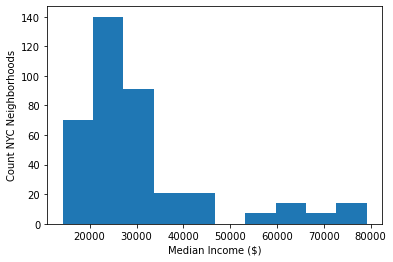

In [7]:
plt.hist(df.median_income)
plt.xlabel("Median Income ($)")
plt.ylabel("Count NYC Neighborhoods")


Also curious to preview correlations between some of our columns. Let's see if the demographic percentages. We can make a panel plot for each ethnicity listed in our dataset

0 (<AxesSubplot:>, 'white')
1 (<AxesSubplot:>, 'black')
2 (<AxesSubplot:>, 'asian')
3 (<AxesSubplot:>, 'hispanic')
4 (<AxesSubplot:>, 'other')


Text(0, 0.5, 'Median income by neighborhood ($)')

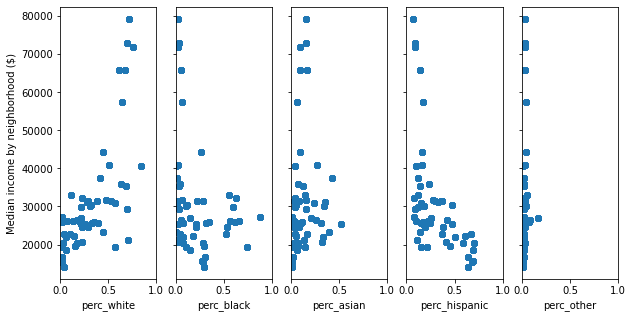

In [24]:
ethnicities = ["white", "black", "asian", "hispanic", "other"]

f, axes = plt.subplots(1, 5, figsize=(10, 5), sharey=True)


for i, e in enumerate(zip(axes, ethnicities)):
    
    axis = e[0]
    ethnicity_label = f"perc_{e[1]}"

    # Plot median income vs percentage of population
    axis.scatter(df[ethnicity_label], df.median_income)
    axis.set_xlim(0, 1)
    axis.set_xlabel(ethnicity_label)
    # axis.set_ylabel("Median income by neighborhood ($)")

axes[0].set_ylabel("Median income by neighborhood ($)")


    

